<h1 style="text-align: center;">Zomato Data Analysis</h1>


<h3>Overview of the Project:</h3>

The Zomato Data Analysis project aims to explore and derive insights from Zomato's dataset. This dataset containing information of food restraunts in banglaore who are working with Zomato. The data was scraped from Zomato in two phase. After going through the structure of the website I found. For each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars. The primary goal is to use this data for in-depth analysis, focusing on identifying patterns, trends, and performance indicators that could benefit stakeholders, such as restaurants, delivery partners, or the Zomato platform itself.

<h5>Let's Dive Into Analysis</h5>

In [5]:
#importing the libraries
import pandas as pd
import numpy as np

import re                               # regex pattern matching
import os                               # Allows interaction with the operating system

import warnings
warnings.filterwarnings("ignore")       # Ignoring warnings

<h5>Overview of the Data:</h5>

In [6]:
# loading the data and converting it into a dataframe
data = pd.read_csv('zomato.csv')
zmt = pd.DataFrame(data)

In [7]:
# seeing the topview of the data
zmt.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
# checking the data info
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

<h5>Data Cleaning:</h5>

In [9]:
# Now we are going to drop the unnecessary columns regarding analysis
zmt.drop(['url','address','phone','reviews_list','dish_liked','menu_item'],axis=1,inplace=True)
zmt.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [10]:
# Renaming columns
zmt.rename(columns={'name':'Restaurant','rate':'ratings','listed_in(type)':'Type','listed_in(city)':'City','approx_cost(for two people)':'Cost'},inplace=True)

In [11]:
# Checking the new cleaned data
zmt.head()

,Restaurant,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [12]:

# we are going to drop the null value
zmt.dropna(inplace=True)

<h4>Cleaning individual columns:</h4>

In [13]:
# Groupping the restaurants 
zmt.groupby('Restaurant').count().head()

,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
Restaurant,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3


In [14]:
# '[Ãx][^A-Za-z]+' pattern I got to find disturbed characters using regex and replacing those characters with empty space. 
zmt['Restaurant'] = zmt['Restaurant'].str.replace('100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C','',regex=True)

In [15]:
zmt.groupby('Restaurant').count().head()

,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
Restaurant,,,,,,,,,,
,3,3,3,3,3,3,3,3,3,3
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6


Here see we successfully removed the disturbed characters from restaurant name by reading the databse I found the names having incorrect spell. Let me correct them as well.

In [16]:
# replacing the Caf- or Caf names with cafe using pattern matching
zmt['Restaurant'] = zmt['Restaurant'].str.replace('Caf-|Caf','Cafe',regex = True)

In [17]:
zmt.groupby('Restaurant').count().head()

,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
Restaurant,,,,,,,,,,
,3,3,3,3,3,3,3,3,3,3
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafee,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6


In [18]:
# Using .unique() we can find the unique values from online_order column
zmt['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
# Using .unique() we can find the unique values from book_table column
zmt['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
# Using .unique() we can find the unique values from ratings column
zmt['ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Here, we can see rating column having string values and having object datatype including 'NEW' and '-' values. We know that rating is always out of 5 and in decimal format. So, we need to clean our 'ratings' column

In [21]:
replace = lambda x: x.replace('/5', "") # lambda function to replace /5 to empty string
l = []
for val in map(replace, zmt['ratings']):    # map function to read data from column and replace /5 to empty string
    if val != 'NEW' and val != '-':
        var = float(val)    # converting the result in float datatype and storing into one variable
    l.append(var)
zmt['ratings'] = l  # updating rating column with new and cleaned values


In [22]:
zmt['ratings'].unique(),zmt['ratings'].dtype

(array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
        4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
        4.8, 4.9, 2.1, 2. , 1.8]),
 dtype('float64'))

See we got the cleaned values with float datatype.

In [23]:
# checking votes column having null values
zmt['votes'].isnull().value_counts()

votes
False    43533
Name: count, dtype: int64

In [24]:
# checking location column having null values
zmt['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [25]:
# checking rest_type column having unique or null values
zmt['rest_type'].unique(),zmt['rest_type'].isnull().value_counts()

(array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
        'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
        'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
        'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
        'Quick Bites, Sweet Shop', 'Microbrewery',
        'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
        'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
        'Dessert Parlor, Quick Bites

In [26]:
# checking cuisines column having unique or null values
zmt['cuisines'].unique(),zmt['cuisines'].isnull().value_counts()

(array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
        'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
        'North Indian, Street Food, Biryani',
        'North Indian, Chinese, Arabian, Momos'], dtype=object),
 cuisines
 False    43533
 Name: count, dtype: int64)

In [27]:
# checking Cost column having unique or null values
zmt['Cost'].unique(),zmt['Cost'].isnull().value_counts()

(array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
        '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
        '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
        '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
        '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
        '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
        '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
        '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
        '4,500'], dtype=object),
 Cost
 False    43533
 Name: count, dtype: int64)

Here we see cost column string values with ',' values. And we know cost is always in int so we need to make some transformations.<br>
Changes need to do:

&#x2022; Remove ',' from values<br>
&#x2022; Change datatype object to integer(int)



In [28]:
# we can also apply lambda function using .apply()
zmt['Cost'] = zmt['Cost'].apply(lambda x:x.replace(',',"")).astype(int)

In [29]:
zmt['Cost'].unique(),zmt['Cost'].isnull().value_counts()

(array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
         750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
         199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
        2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
          40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
         360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500]),
 Cost
 False    43533
 Name: count, dtype: int64)

Here, Using lambda function we replaced ',' to empty string and using astype(int) we converted datatype object to int and update in the cost column and we got cleaned data.



In [30]:
zmt['Cost'].dtype

dtype('int32')

In [31]:
# checking Type column having unique or null values
zmt['Type'].unique(),zmt['Type'].isnull().value_counts()

(array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
        'Drinks & nightlife', 'Pubs and bars'], dtype=object),
 Type
 False    43533
 Name: count, dtype: int64)

In [32]:

# checking Type column having unique or null values
zmt['City'].unique(),zmt['City'].isnull().value_counts()

(array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
        'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
        'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
        'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
        'Koramangala 4th Block', 'Koramangala 5th Block',
        'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
        'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
        'Old Airport Road', 'Rajajinagar', 'Residency Road',
        'Sarjapur Road', 'Whitefield'], dtype=object),
 City
 False    43533
 Name: count, dtype: int64)

Here in 'Type' and 'City' all values are correct and having correct datatype so there is no need to perform any cleaning operation.

<h4>Droping Duplicates:</h4>

In [33]:
# by using .duplicated() we can see duplicate values from our dataset
zmt.duplicated().value_counts()

False    43453
True        80
Name: count, dtype: int64

We got 80 duplicate values in our dataset we need to remove those.

In [34]:
# dropping duplicates values using .drop_duplicates()
zmt.drop_duplicates(keep='last',inplace=True)   

In [35]:
# reseting index
zmt.reset_index(drop=True,inplace=True)

In [36]:
zmt.duplicated().value_counts()

False    43453
Name: count, dtype: int64

As a final step we removed all duplicate values from our dataset and we got fully cleaned data.

In [37]:
zmt

,Restaurant,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafee,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
43448,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
43449,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
43450,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
43451,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


In [38]:
# getting the information about cleaned data
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43453 entries, 0 to 43452
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    43453 non-null  object 
 1   online_order  43453 non-null  object 
 2   book_table    43453 non-null  object 
 3   ratings       43453 non-null  float64
 4   votes         43453 non-null  int64  
 5   location      43453 non-null  object 
 6   rest_type     43453 non-null  object 
 7   cuisines      43453 non-null  object 
 8   Cost          43453 non-null  int32  
 9   Type          43453 non-null  object 
 10  City          43453 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 3.5+ MB


In [39]:
# Saving cleaned dataset in output directory.
zmt.to_csv('./zomato_cleaned_data.csv')

<h3>Data Visualization</h3>

In data visualization we going to visualize our data how it is, and trying to find some informative data from our dataset.

Here we are going to use two python libraries For visualization.

&#x2022; Seaborn<br>
&#x2022; Matplotlib

In [40]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
zmt.head()

,Restaurant,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafee,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


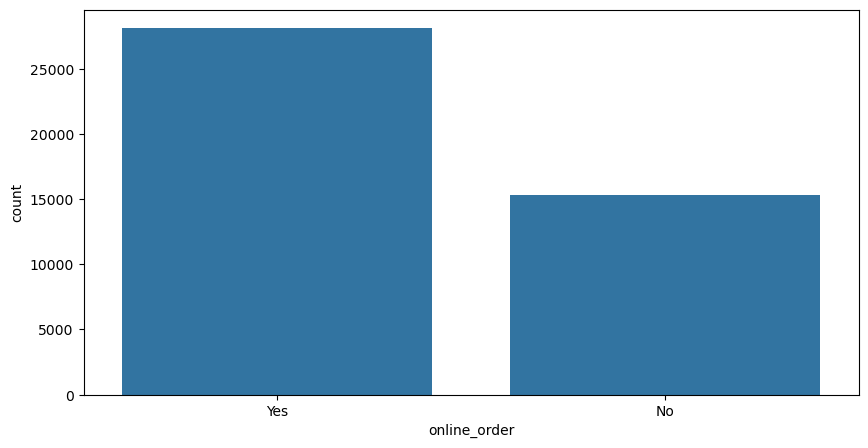

In [42]:
# How many restaurants accepting online order for zomato?

plt.figure(figsize=(10,5))
sns.countplot(x='online_order',data=zmt)
plt.show()

By observing the graph, we can say that 25000+ restaurants are accepting online order for zomato and 15000 restaurants not accepting online orders.

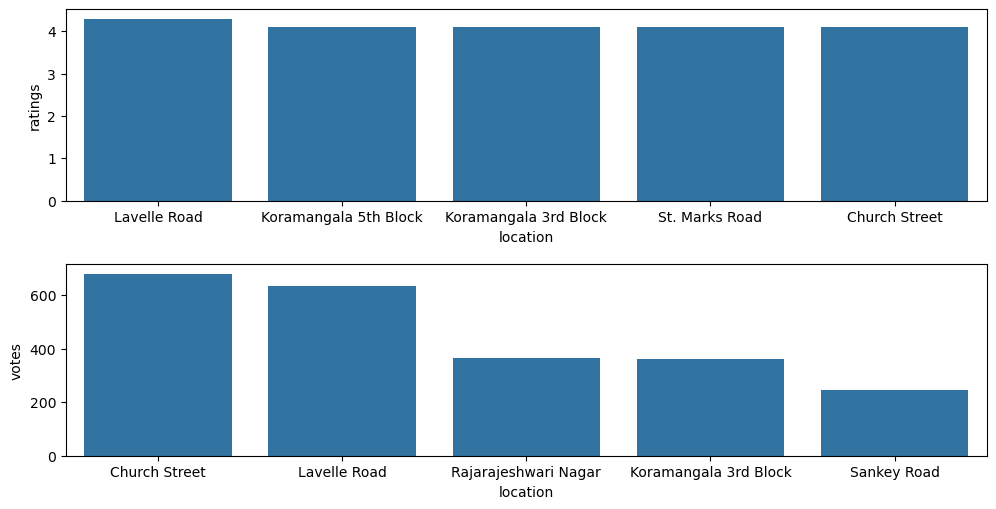

In [43]:
# Find best location by seeing dataset.

# RATINGS
plt.figure(figsize=(10,5))
ax = plt.subplot(2,1,1)

loc_ratings = zmt.groupby('location').agg({'ratings':'median'})
loc_sorted_values = loc_ratings.sort_values('ratings',ascending=False).head(5).reset_index()

plt.tight_layout()
sns.barplot(x='location',y='ratings',data=loc_sorted_values)

# VOTES
ax = plt.subplot(2,1,2)
loc_votes = zmt.groupby('location').agg({'votes':'median'})
loc_votes_sorted = loc_votes.sort_values('votes',ascending=False).head(5).reset_index()

plt.tight_layout()
sns.barplot(x='location',y='votes',data=loc_votes_sorted)
plt.show()

By observing the above graphs,'levelle Road' has an high rating and votes as well as compare to other.

So, we can say that 'levelle Road' is a best location by comparing 'votes' and 'rating' of locations.

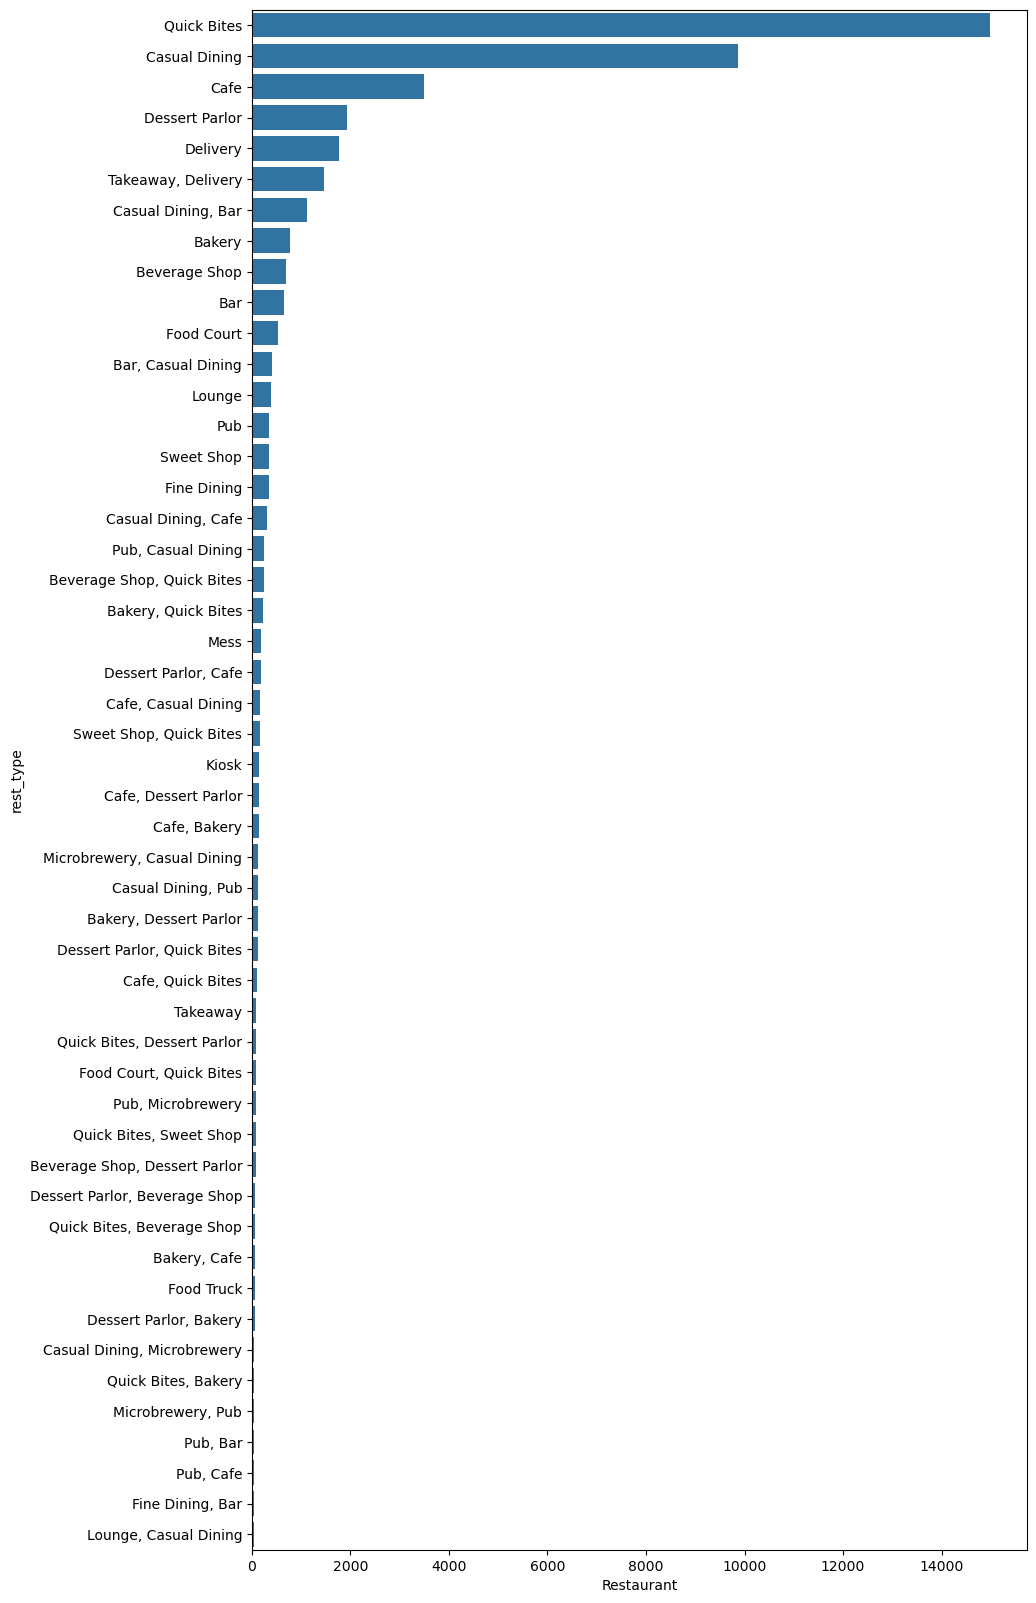

In [44]:
# Find types of restaurants and their count.

plt.figure(figsize=(10,20))

res_type = zmt.groupby('rest_type')['Restaurant'].count().reset_index()
sort_res_type = res_type.sort_values('Restaurant',ascending=False).head(50)

plt.tight_layout()
sns.barplot(x='Restaurant',y='rest_type',data=sort_res_type)
plt.show()

By observing above graph, the 1st line of grapth shows the number of rest_type we have that is 87 and we plotted only top 40 types which are high count of restaurants types.

ex:

14000 Quick Bites restaurants.

10000 Casual Dining restaurants.

and so on...

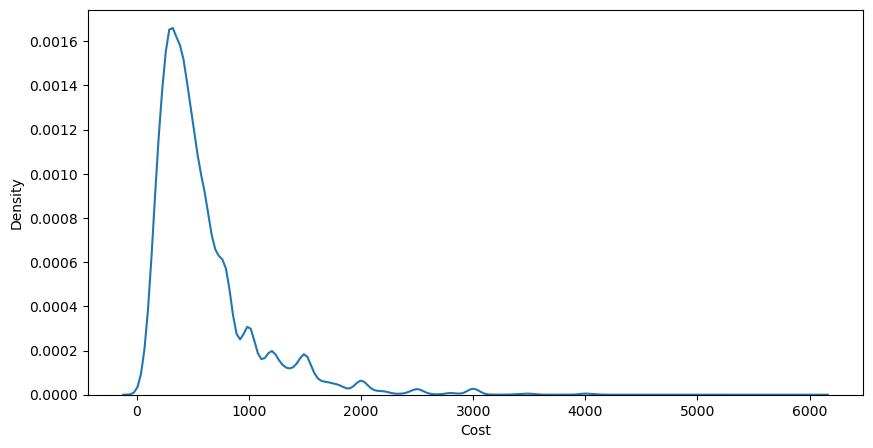

In [45]:
# Find cost's of restaurant
plt.figure(figsize=(10,5))
sns.kdeplot(x='Cost',data=zmt)      # KDE plot(Kernel Density Estimate plot) is a way to visualize the distribution of a dataset, similar to a histogram, but smoother. 
plt.show()


By observing above kde plot we can say that most of the restaurants have cost between 1 to 1000Rs. for food and remaining have above 1000Rs for their food.

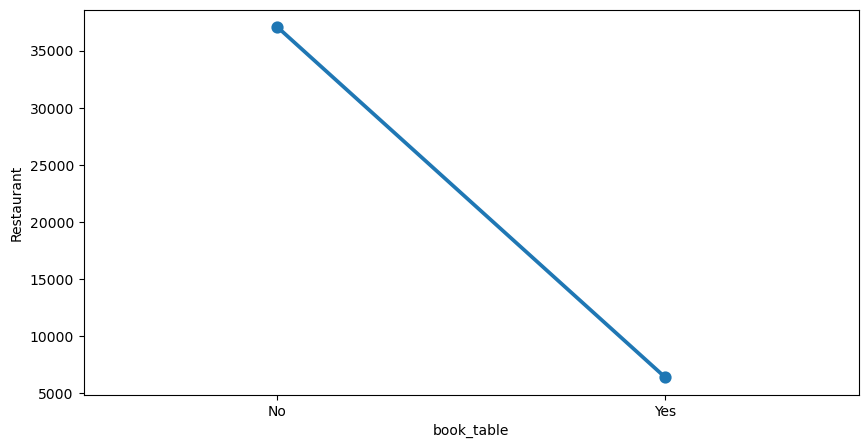

In [46]:
# Find count of restaurants have table booking facility.

plt.figure(figsize=(10,5))
table_booking_res = zmt.groupby('book_table')['Restaurant'].count().reset_index()
sorted_table_booking_res = table_booking_res.sort_values('Restaurant',ascending=False).head(50)

plt.tight_layout()
sns.pointplot(x='book_table',y='Restaurant',data=sorted_table_booking_res)
plt.show()

By seeing above pointplot we can say that only 7000 restaurants have table booking facility and 35000+ restaurants don't have facility of table booking.

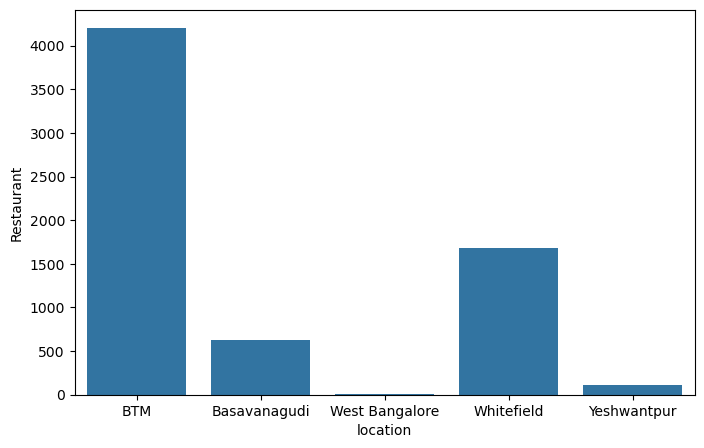

In [47]:
#  Find number of restaurant at given location.
# 'BTM'
# 'Basavanagudi'
# 'West Bangalore'
# 'Whitefield'
# 'Yeshwantpur'

plt.figure(figsize=(8,5))

df = pd.DataFrame(zmt.groupby('location')['Restaurant'].count()).reset_index()
sort_loc_res = df['location'].isin(['BTM','Basavanagudi','West Bangalore','Whitefield','Yeshwantpur'])

plt.tight_layout()
sns.barplot(x='location',y='Restaurant',data=df[sort_loc_res])
plt.show()

By seeing given plot, we can notice that how many restaurants present are at given locations.

Ex:-

BTM location has 4000+ restaurants

In [48]:
# Find most famous restaurants chains(like Franchise(Restaurants having more than one branch) in Bangalore.
df1 = pd.DataFrame(zmt.groupby(['location','Restaurant','ratings']).count()).reset_index()
df1



,location,Restaurant,ratings,online_order,book_table,votes,rest_type,cuisines,Cost,Type,City
0,BTM,,3.7,3,3,3,3,3,3,3,3
1,BTM,2nd Home Restaurant,3.7,11,11,11,11,11,11,11,11
2,BTM,36th Cross Coffee Mane,3.7,1,1,1,1,1,1,1,1
3,BTM,"3B's - Buddies, Bar & Barbecues",4.4,13,13,13,13,13,13,13,13
4,BTM,A2B - Adyar Ananda Bhavan,3.8,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
12606,Yeshwantpur,The Cupcake Story,3.5,1,1,1,1,1,1,1,1
12607,Yeshwantpur,The Duke Of Juices,3.3,1,1,1,1,1,1,1,1
12608,Yeshwantpur,Tuckinto,3.8,2,2,2,2,2,2,2,2
12609,Yeshwantpur,Udupi Garden,3.0,2,2,2,2,2,2,2,2


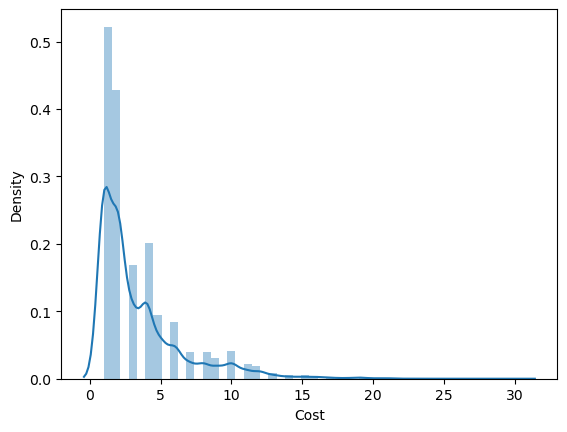

In [49]:
sns.distplot(df1['Cost'])
plt.show()

Note that all columns having some count values these are nothing but a count of that restaurant at given location.

We can see some restaurants having 1 count and some having more than 1. We want that restaurants which having more than 1 count and high rating.

In [50]:
chains_restaurant = df1[df1['book_table']>1]
famous_res = pd.DataFrame(chains_restaurant.groupby('location')[['Restaurant','ratings']].max()).reset_index()
famous_res



,location,Restaurant,ratings
0,BTM,eat.fit,4.9
1,Banashankari,Yo Roll Corner,4.6
2,Banaswadi,Zam Zam Restaurant,4.0
3,Bannerghatta Road,Zhangs Classic,4.6
4,Basavanagudi,Zephyr,4.6
...,...,...,...
84,West Bangalore,FreshMenu,3.3
85,Whitefield,nu.tree,4.9
86,Wilson Garden,Vijaya Sagar,4.0
87,Yelahanka,Prashanth Naati Corner,3.9


Finally, we got restaurant at each location has more that one branch and highest rating. Total 89 result we got. Let's try to plot only first 5 to get idea.

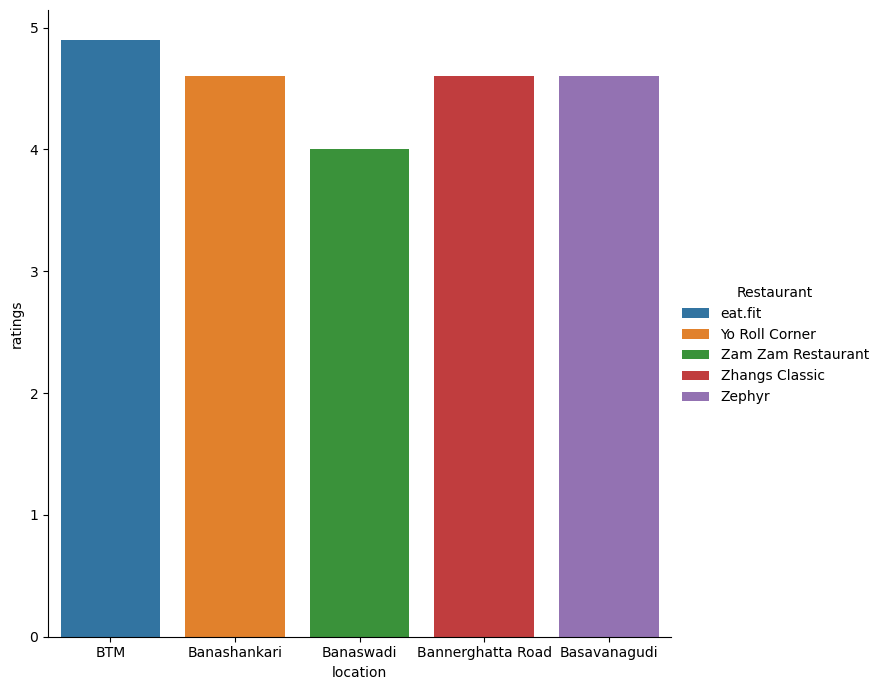

In [51]:

sns.catplot(x='location',y='ratings',hue='Restaurant',kind='bar',height=7,data=famous_res.head(5))
plt.show()

Here we can see that famous restaurant having more that one branch at location and their rating as well.

<Figure size 640x480 with 0 Axes>

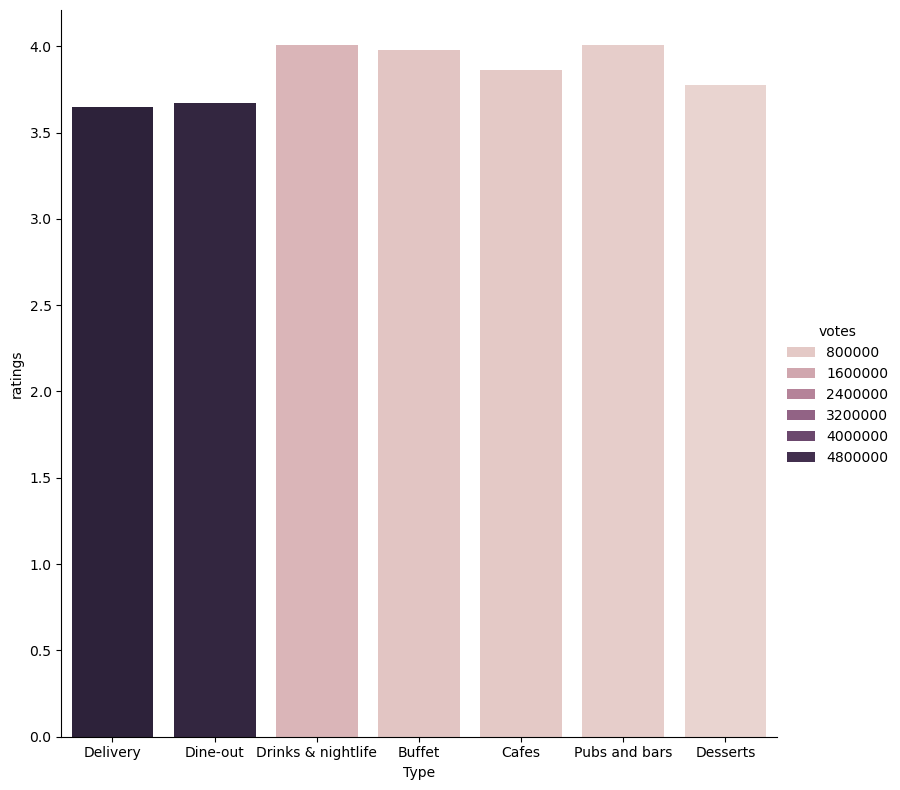

In [52]:
# Find how many voters gives rating for each 'type' and aggregate rating of that 'type'.

count_votes = zmt.groupby('Type').agg({'votes':'sum','ratings':'mean'}).nlargest(7,['votes']).reset_index()
plt.tight_layout()
sns.catplot(x='Type',y='ratings',hue='votes',kind='bar',height=8,data=count_votes)
plt.show()


Here we can see that, how many voters gives rating for each type and average rating of that type.

<Axes: xlabel='ratings', ylabel='Density'>

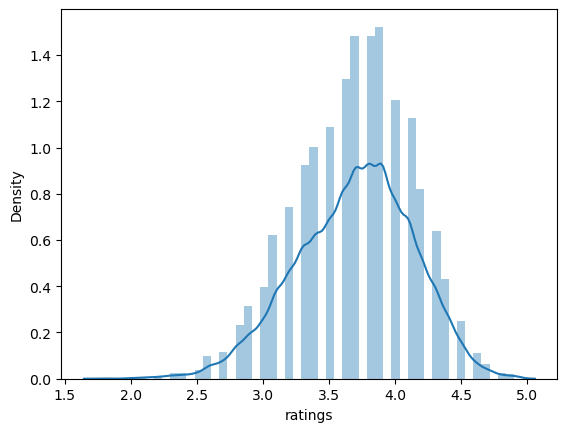

In [53]:
# Gaussian Rest Type(Normal Distribution) of Rating.

sns.distplot(zmt['ratings'])

We got a normal distribution form of our rating and we observe that we have maximum ratings between 3.5 to 4.5.

In [54]:
# Find the how many Restaurants havign Chinese and North Indian food in their food type.

Chinese = len([i for i in zmt['cuisines'] if 'Chinese' in i])   # count of restaurants who serving chinese food.
North_Indian = len([i for i in zmt['cuisines'] if 'North Indian' in i]) # count of restaurants who serving North Indian food.

Restaurant_count = [Chinese,North_Indian]   #creating list
Cuisines = ['Chinese','North_Indian']

df3 = pd.DataFrame({'cuisines':Cuisines,'Restaurant_count':Restaurant_count})   #.set_index('Food_Type') and creating dataset of extracted data


[]

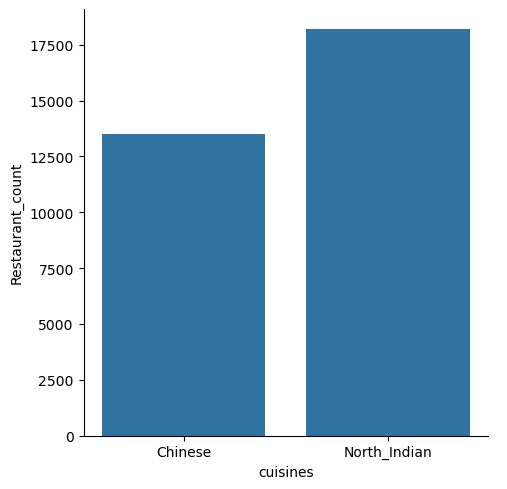

In [55]:
sns.catplot(x='cuisines',y='Restaurant_count',kind='bar',data=df3)
plt.plot()

Here, We got actual count of restaurants who serving 'Chinese' and 'North Indian' food.

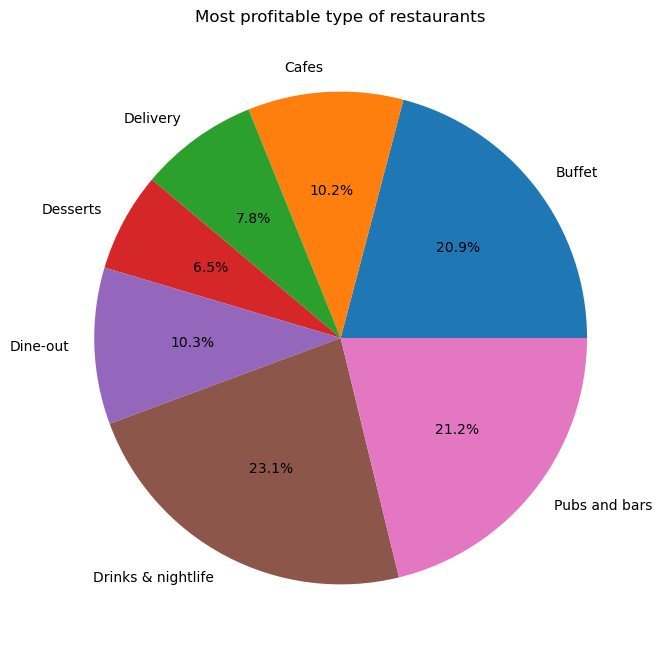

In [56]:
# 10) Find the most profitable type of restaurant.

profitable_res = zmt.groupby('Type').agg({'Cost':'mean'})

plt.figure(figsize=(8,8))
plt.pie(profitable_res['Cost'],labels=profitable_res.index,autopct='%1.1f%%')
plt.title('Most profitable type of restaurants')
plt.show()

Here, by seeing the total percentage of average cost we can observe that. The restaurants having Drink and Nightlife facility are in high profit than other types.

# 

<h4>Conclusion:</h4>

In the Given dataset we have explored and learned many things,

&#x2022;We learned about how to clean our data.<br>
&#x2022;How we can interprete data by visualizing it.